In [ ]:
import sys

def dijkstra(adjmatrix, source):
    # Initialize distances and predecessors
    n = len(adjmatrix)
    distances = [float('inf')] * n
    predecessors = [-1] * n
    distances[source] = 0

    # Create an array-based priority queue to store vertices
    pq = list(range(n))

    while pq:
        # Find the vertex with the minimum distance
        u = min(pq, key=lambda vertex: distances[vertex])
        pq.remove(u)

        # Update distances to neighbors
        for v in range(n):
            if adjmatrix[u][v] > 0 and v in pq:
                alt = distances[u] + adjmatrix[u][v]
                if alt < distances[v]:
                    distances[v] = alt
                    predecessors[v] = u

    return distances, predecessors

# Example adjacency matrix representing a weighted directed graph
adjacency_matrix = [
    [0,1,1,0],
    [0,0,1,0],
    [0,0,0,1],
    [1,0,0,0],

]

# Source vertex
source_vertex = 0

distances, predecessors = dijkstra(adjacency_matrix, source_vertex)

# Print the result, which includes distances and predecessors
print("Distances:", distances)
print("Predecessors:", predecessors)



Distances: [0, 1, 1, 2]
Predecessors: [-1, 0, 0, 2]


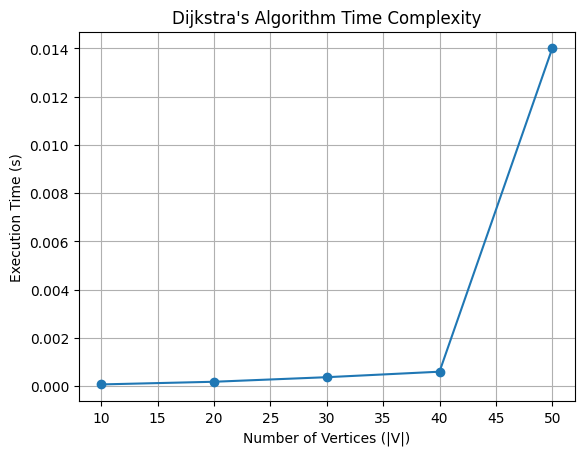

In [ ]:
import sys
import time
import random
import matplotlib.pyplot as plt



# Function to generate a random graph with specified number of vertices and edges
def generate_random_graph(num_vertices, num_edges):
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    for _ in range(num_edges):
        u = random.randint(0, num_vertices - 1)
        v = random.randint(0, num_vertices - 1)
        if u != v:
            weight = random.randint(1, 100)  # Random edge weight
            adjacency_matrix[u][v] = weight
    return adjacency_matrix

# Measure execution time for different graph sizes
graph_sizes = [10, 20, 30, 40, 50]  # Vary the number of vertices
execution_times = []

for num_vertices in graph_sizes:
    num_edges = num_vertices * num_vertices // 4  # Vary the number of edges
    adjacency_matrix = generate_random_graph(num_vertices, num_edges)

    start_time = time.time()
    distances, predecessors = dijkstra(adjacency_matrix, 0)
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot the results
plt.plot(graph_sizes, execution_times, marker='o')
plt.xlabel('Number of Vertices (|V|)')
plt.ylabel('Execution Time (s)')
plt.title('Dijkstra\'s Algorithm Time Complexity')
plt.grid(True)
plt.show()


Theoretical Time Complexity:
Initialization: Initializing the distances distances and predecessors predecessors takes O(|V|) time because we perform these operations once for each vertex.

Main Loop: The main loop executes |V| times, where |V| is the number of vertices. In each iteration of the loop:

Finding the minimum distance vertex: This operation can be implemented in O(|V|) time because we iterate through all vertices to find the minimum distance vertex.

Updating distances to neighbors: For each neighbor of the current vertex, we update the distance if a shorter path is found. In the worst case, this involves examining all edges, which would take O(|E|) time.

Updating the priority queue (pq): When updating distances, you need to adjust the priority queue. This operation can take up to O(|V|) time if you use an array to search for the minimum distance vertex.

Overall, the theoretical time complexity is O(|V|^2) for the array-based priority queue, dominated by the loop that finds the minimum distance vertex in each iteratio

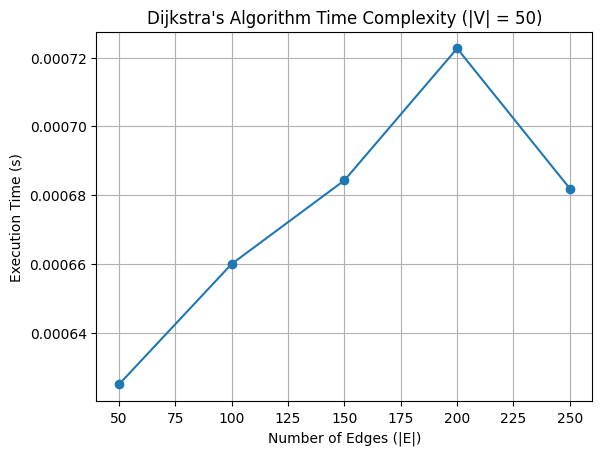

In [ ]:
import sys
import time
import random
import matplotlib.pyplot as plt



# Function to generate a random graph with a specified number of vertices and edges
def generate_random_graph(num_vertices, num_edges):
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    edges_generated = 0
    while edges_generated < num_edges:
        u = random.randint(0, num_vertices - 1)
        v = random.randint(0, num_vertices - 1)
        if u != v and adjacency_matrix[u][v] == 0:
            weight = random.randint(1, 100)  # Random edge weight
            adjacency_matrix[u][v] = weight
            edges_generated += 1
    return adjacency_matrix

# Specify the number of vertices (|V|) and vary the number of edges (|E|)
num_vertices = 50  # Constant number of vertices
edge_counts = [50, 100, 150, 200, 250]  # Vary the number of edges
execution_times = []

for num_edges in edge_counts:
    adjacency_matrix = generate_random_graph(num_vertices, num_edges)

    start_time = time.time()
    distances, predecessors = dijkstra(adjacency_matrix, 0)
    end_time = time.time()

    execution_time = end_time - start_time
    execution_times.append(execution_time)

# Plot the results
plt.plot(edge_counts, execution_times, marker='o')
plt.xlabel('Number of Edges (|E|)')
plt.ylabel('Execution Time (s)')
plt.title('Dijkstra\'s Algorithm Time Complexity (|V| = 50)')
plt.grid(True)
plt.show()
